In [13]:
import Picoquant_PL as pl
import os
os.chdir(r'C:\Users\tselb\OneDrive - University of Cambridge\Documents\Mini 1\Microscope\2022-01-21\dlandbulk.sptw')
import matplotlib.pyplot as plt
import numpy as np
from matplotlib_scalebar.scalebar import ScaleBar
from copy import copy
import glob

Note the use of 'Picoquant_PL' this is a module written by someone in the Stanks group- seperate instructions on using Picoquant will be provided

# Import files

In [20]:
filelist = glob.glob("plottable/*.ptu")     #Plottable is where I have pllaced all the best plots, confocal and bp
bp_filelist = [x for x in filelist if "bp" in x]        #find the files containing bp
filelist = [x for x in filelist if 'bp' not in x]       #find the files that are confocal

# Plot

 - Loading 'plottable\azz_bulk_bp2.ptu' ... 
 [DONE]

 - Loading 'plottable\azz_bulk1.ptu' ... 
 [DONE]



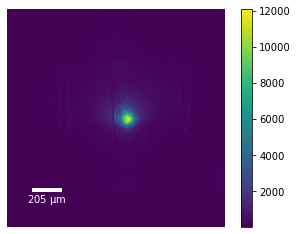

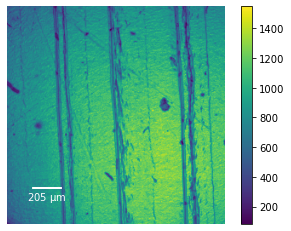

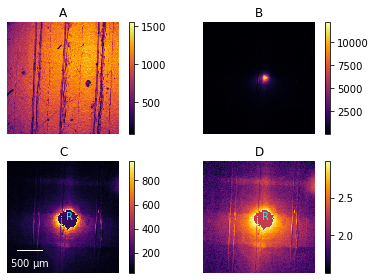

 - Loading 'plottable\azz_bulk_defocused_bp2.ptu' ... 
 [DONE]

 - Loading 'plottable\azz_bulk_defocused1.ptu' ... 
 [DONE]



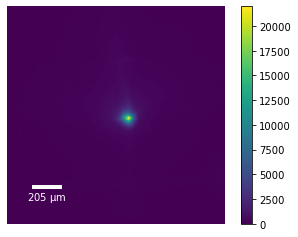

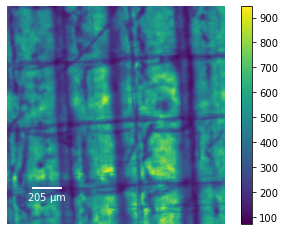

C:\Users\tselb\AppData\Local\Temp/ipykernel_18112/3625933930.py:38: RuntimeWarning: divide by zero encountered in log10
  pcm = ax.pcolormesh(np.log10(pl_array))


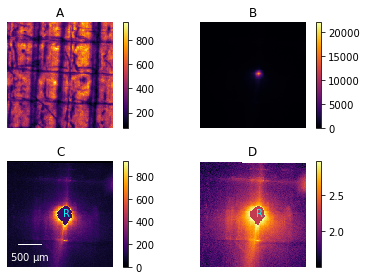

 - Loading 'plottable\bulk_bp4.ptu' ... 
 [DONE]

 - Loading 'plottable\bulk1.ptu' ... 
 [DONE]



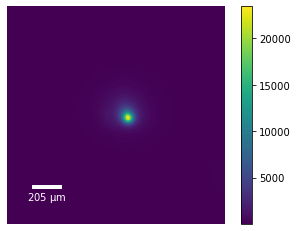

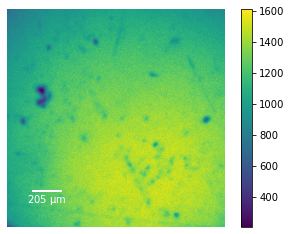

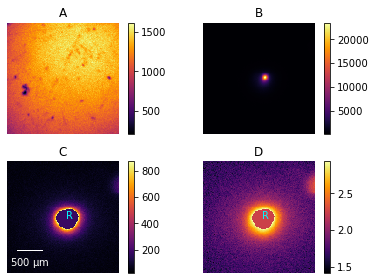

 - Loading 'plottable\dl_zz_edge_bp2.ptu' ... 
 [DONE]

 - Loading 'plottable\dl_zz_edge1.ptu' ... 
 [DONE]



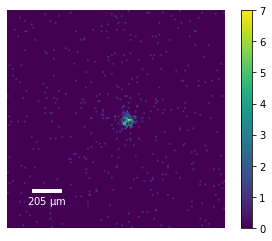

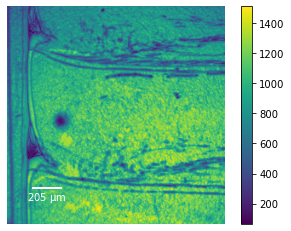

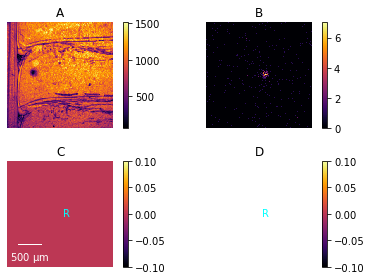

 - Loading 'plottable\sl_zz_edge_bp3.ptu' ... 
 [DONE]

 - Loading 'plottable\sl_zz_edge2.ptu' ... 
 [DONE]



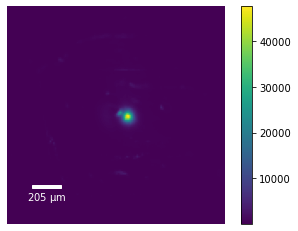

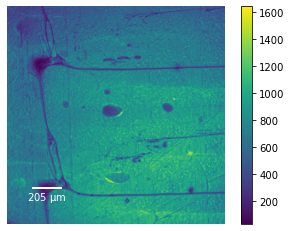

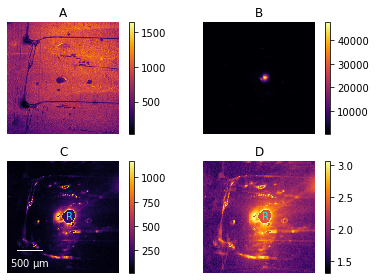

In [21]:
for k in range(len(filelist)):          #iterate over all files in plottable directory

    data, tags = pl.import_convert(bp_filelist[k][:-4], detector=1)
    data1, tags1 = pl.import_convert(filelist[k][:-4], detector=1)
    pl_array, scale_bar_len_um, scale_bar_len_pixels = pl.plot_pl(data, tags)
    pl_array1, scale_bar_len_um1, scale_bar_len_pixels1 = pl.plot_pl(data1, tags1)
    laser_spot= np.where(pl_array == np.amax(pl_array)) #Get where the laser spot is


    #%% create subplots
    fig, axs =plt.subplots(2,2,)#zaspect=False)
    scalebar = ScaleBar(scale_bar_len_pixels, "um", location= 'lower left', color='white', box_alpha=0,length_fraction=0.3)#Note scale_bar_len_pixels returns the lenth of one pixel
    #%% place confocal data in top left
    ax = axs[0,0]
    pcm = ax.pcolormesh(pl_array1)
    ax.set_aspect(aspect=1)
    pcm.set_cmap('inferno')
    fig.colorbar(pcm, ax=ax)
    ax.axis('off')
    
    
    #%% place bl in top right
    ax=axs[0,1]
    pcm = ax.pcolormesh(pl_array)
    ax.set_aspect(aspect=1)
    pcm.set_cmap('inferno')
    fig.colorbar(pcm, ax=ax)
    
    ax.axis('off')
    #%% place bp with everything 5*mean removed and a log scale (bottom right)
    for j in range(2):
        ax = axs[1,j]
        new_scalebar=copy(scalebar)
        if j==0:
            pl_array[pl_array > np.mean(pl_array)*5] = np.mean(pl_array) #Thought about using IQR to identify laser spot outlier more ofmally but doesn't work well so just use mean*10, set to mean if this is the case
            ax.text(laser_spot[0]+3,laser_spot[1],'R',color='cyan',va='top',ha='left')    #Place R
        if j==1:
            pcm = ax.pcolormesh(np.log10(pl_array))
            ax.set_aspect(aspect=1)
            ax.text(laser_spot[0]+3,laser_spot[1],'R',color='cyan',va='top',ha='left')    #place R
            pcm.set_cmap('inferno')
            fig.colorbar(pcm, ax=ax)
            ax.axis('off')
            
        else:
            pcm = ax.pcolormesh(pl_array)
            ax.set_aspect(aspect=1)
            pcm.set_cmap('inferno')
            fig.colorbar(pcm, ax=ax)
            ax.axis('off')
            ax.add_artist(scalebar)
            
            
    axs[0,0].set_title('A')
    axs[0,1].set_title('B')
    axs[1,0].set_title('C')
    axs[1,1].set_title('D')
    plt.tight_layout()
    plt.show()